# 2016 to 2020: KBO preprocessing _ myPart

SB_D, CS_D, SB_R, CS_R, SF_H, HBP_H, ERA, HBP_P, ER, CG, SHO, SF_P, RA

In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import pandas as pd

df = pd.read_csv('my_data.csv')
df.head()

,yearID,teamID,SB_D,CS_D,SB_R,CS_R,SF_H,HBP_H,ERA,HBP_P,ER,CG,SHO,SF_P,RA
0,2020,키움,54,26,65,14,37,46,4.37,48,380,0,2,22,4.76
1,2020,KIA,48,28,23,10,16,37,4.48,32,358,1,2,25,4.86
2,2020,LG,47,23,46,26,31,43,4.59,49,392,1,8,32,5.03
3,2020,삼성,34,22,81,36,31,44,4.61,41,382,2,9,30,5.22
4,2020,롯데,55,16,53,20,26,35,4.61,29,365,1,9,34,5.00


In [3]:
for i in range(len(df)):
    if df['teamID'][i]=='두산':
        df['teamID'][i]='OB'
    elif df['teamID'][i]=='키움' or df['teamID'][i]=='넥센':
        df['teamID'][i]='WO'
    elif df['teamID'][i]=='KIA':
        df['teamID'][i]='HT'
    elif df['teamID'][i]=='삼성':
        df['teamID'][i]='SS'
    elif df['teamID'][i]=='롯데':
        df['teamID'][i]='LT'
    elif df['teamID'][i]=='한화':
        df['teamID'][i]='HH'
    
df.head()

,yearID,teamID,SB_D,CS_D,SB_R,CS_R,SF_H,HBP_H,ERA,HBP_P,ER,CG,SHO,SF_P,RA
0,2020,WO,54,26,65,14,37,46,4.37,48,380,0,2,22,4.76
1,2020,HT,48,28,23,10,16,37,4.48,32,358,1,2,25,4.86
2,2020,LG,47,23,46,26,31,43,4.59,49,392,1,8,32,5.03
3,2020,SS,34,22,81,36,31,44,4.61,41,382,2,9,30,5.22
4,2020,LT,55,16,53,20,26,35,4.61,29,365,1,9,34,5.00


In [4]:
df = df.sort_values(by=['yearID', 'teamID'], ascending=True)
df.head()

,yearID,teamID,SB_D,CS_D,SB_R,CS_R,SF_H,HBP_H,ERA,HBP_P,ER,CG,SHO,SF_P,RA
40,2016,HH,124,66,64,38,41,91,5.76,76,827,1,2,59,6.32
46,2016,HT,136,49,101,50,45,87,4.97,59,705,7,5,54,5.54
48,2016,KT,115,55,96,46,45,48,5.92,84,838,1,2,45,6.55
42,2016,LG,80,49,121,70,54,72,5.04,109,721,2,5,56,5.64
49,2016,LT,90,59,145,64,41,83,5.63,78,792,2,5,52,6.15


In [5]:
df.to_csv('nakon.csv', index = False, encoding = 'cp949')

# Data Split

In [6]:
df = pd.read_csv('kbo_data_2016to2020.csv')
df.head()

,yearID,teamID,franchID,SB_D,CS_D,SB_R,CS_R,SF_H,HBP_H,ERA,...,PPF,SV,IPOuts,HA,HRA,BBA,SOA,E,DP,W
0,2016,HH,DJ,124,66,64,38,41,91,5.76,...,0.998399,24,3878,1520,155,634,976,124,229,66
1,2016,HT,GJ,136,49,101,50,45,87,4.97,...,0.966443,38,3828,1456,131,561,965,111,219,70
2,2016,KT,SW,115,55,96,46,45,48,5.92,...,1.006298,27,3819,1593,145,560,980,130,264,53
3,2016,LG,SO,80,49,121,70,54,72,5.04,...,0.984622,34,3863,1426,122,539,909,103,217,71
4,2016,LT,BS,90,59,145,64,41,83,5.63,...,0.987212,27,3799,1486,161,585,1009,91,229,66


In [7]:
del df['yearID']; del df['teamID']; del df['franchID']; del df['Attendence']
df.head()

,SB_D,CS_D,SB_R,CS_R,SF_H,HBP_H,ERA,HBP_P,ER,CG,...,PPF,SV,IPOuts,HA,HRA,BBA,SOA,E,DP,W
0,124,66,64,38,41,91,5.76,76,827,1,...,0.998399,24,3878,1520,155,634,976,124,229,66
1,136,49,101,50,45,87,4.97,59,705,7,...,0.966443,38,3828,1456,131,561,965,111,219,70
2,115,55,96,46,45,48,5.92,84,838,1,...,1.006298,27,3819,1593,145,560,980,130,264,53
3,80,49,121,70,54,72,5.04,109,721,2,...,0.984622,34,3863,1426,122,539,909,103,217,71
4,90,59,145,64,41,83,5.63,78,792,2,...,0.987212,27,3799,1486,161,585,1009,91,229,66


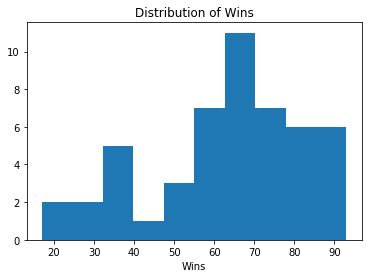

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [9]:
df.corr()['W']

SB_D      0.406149
CS_D      0.529934
SB_R      0.623423
CS_R      0.453063
SF_H      0.689744
HBP_H     0.750313
ERA      -0.313221
HBP_P     0.577222
ER        0.503294
CG        0.209995
SHO       0.473576
SF_P      0.445842
RA       -0.339742
WSWin     0.358642
R         0.876900
AB        0.838537
H         0.867653
2B        0.818614
3B        0.607394
HR        0.678608
BB        0.627698
SO        0.806856
Rank     -0.522707
G         0.828139
Ghome     0.828230
L         0.376479
D         0.232757
FP        0.109302
BPF      -0.033248
PPF      -0.173976
SV        0.922951
IPOuts    0.837875
HA        0.732641
HRA       0.491891
BBA       0.627698
SOA       0.806856
E         0.664863
DP        0.259039
W         1.000000
Name: W, dtype: float64

In [10]:
del df['FP']; del df['BPF']; del df['PPF']
df.head()

,SB_D,CS_D,SB_R,CS_R,SF_H,HBP_H,ERA,HBP_P,ER,CG,...,D,SV,IPOuts,HA,HRA,BBA,SOA,E,DP,W
0,124,66,64,38,41,91,5.76,76,827,1,...,3,24,3878,1520,155,634,976,124,229,66
1,136,49,101,50,45,87,4.97,59,705,7,...,1,38,3828,1456,131,561,965,111,219,70
2,115,55,96,46,45,48,5.92,84,838,1,...,2,27,3819,1593,145,560,980,130,264,53
3,80,49,121,70,54,72,5.04,109,721,2,...,2,34,3863,1426,122,539,909,103,217,71
4,90,59,145,64,41,83,5.63,78,792,2,...,0,27,3799,1486,161,585,1009,91,229,66


In [11]:
x_data = df.values[:, 0:35]
x_data

array([[124.,  66.,  64., ..., 976., 124., 229.],
       [136.,  49., 101., ..., 965., 111., 219.],
       [115.,  55.,  96., ..., 980., 130., 264.],
       ...,
       [ 82.,  31.,  44., ..., 447.,  46.,  53.],
       [ 34.,  22.,  81., ..., 401.,  43.,  57.],
       [ 54.,  26.,  65., ..., 425.,  47.,  62.]])

In [12]:
y_data = df.values[:, [35]]  # 1:survived
y_data

array([[66.],
       [70.],
       [53.],
       [71.],
       [66.],
       [83.],
       [93.],
       [69.],
       [65.],
       [77.],
       [61.],
       [87.],
       [50.],
       [69.],
       [80.],
       [79.],
       [84.],
       [75.],
       [55.],
       [69.],
       [77.],
       [70.],
       [59.],
       [68.],
       [68.],
       [58.],
       [93.],
       [78.],
       [68.],
       [75.],
       [58.],
       [62.],
       [71.],
       [79.],
       [48.],
       [73.],
       [88.],
       [88.],
       [60.],
       [86.],
       [17.],
       [33.],
       [31.],
       [34.],
       [30.],
       [42.],
       [38.],
       [21.],
       [34.],
       [38.]])

# Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
x_data = scaler.fit_transform(x_data)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45, 35), (45, 1), (5, 35), (5, 1))

# Deep Learning

In [16]:
%%time
import keras
from keras.models import Sequential  # 뇌, 건물
from keras.layers import Dense       # 한 층
from keras.layers import Dropout

model = Sequential()
model.add(Dense(256, input_shape=(35,), activation='relu')) # 1층
model.add(Dense(256, activation='relu'))  # 2층
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax')) # 3층
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Using TensorFlow backend.


Train on 45 samples, validate on 5 samples
Epoch 1/500
45/45 [==============================] - 2s 50ms/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 2/500
45/45 [==============================] - 0s 702us/step - loss: 4316.0890 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 3/500
45/45 [==============================] - 0s 950us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 4/500
45/45 [==============================] - 0s 837us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 5/500
45/45 [==============================] - 0s 910us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 6/500
45/45 [==============================] - 0s 2ms/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 7/500
45/45 

Epoch 53/500
45/45 [==============================] - 0s 760us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 54/500
45/45 [==============================] - 0s 640us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 55/500
45/45 [==============================] - 0s 674us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 56/500
45/45 [==============================] - 0s 747us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 57/500
45/45 [==============================] - 0s 861us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 58/500
45/45 [==============================] - 0s 775us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 59/500
45/45 [==============================] 

Epoch 105/500
45/45 [==============================] - 0s 767us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 106/500
45/45 [==============================] - 0s 789us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 107/500
45/45 [==============================] - 0s 715us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 108/500
45/45 [==============================] - 0s 788us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 109/500
45/45 [==============================] - 0s 849us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 110/500
45/45 [==============================] - 0s 799us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 111/500
45/45 [=========================

45/45 [==============================] - 0s 791us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 157/500
45/45 [==============================] - 0s 825us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 158/500
45/45 [==============================] - 0s 736us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 159/500
45/45 [==============================] - 0s 724us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 160/500
45/45 [==============================] - 0s 846us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 161/500
45/45 [==============================] - 0s 754us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 162/500
45/45 [==============================] - 0s 77

45/45 [==============================] - 0s 776us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 208/500
45/45 [==============================] - 0s 740us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 209/500
45/45 [==============================] - 0s 838us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 210/500
45/45 [==============================] - 0s 787us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 211/500
45/45 [==============================] - 0s 756us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 212/500
45/45 [==============================] - 0s 759us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 213/500
45/45 [==============================] - 0s 82

45/45 [==============================] - 0s 743us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 259/500
45/45 [==============================] - 0s 803us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 260/500
45/45 [==============================] - 0s 709us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 261/500
45/45 [==============================] - 0s 693us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 262/500
45/45 [==============================] - 0s 697us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 263/500
45/45 [==============================] - 0s 731us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 264/500
45/45 [==============================] - 0s 74

45/45 [==============================] - 0s 693us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 310/500
45/45 [==============================] - 0s 762us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 311/500
45/45 [==============================] - 0s 807us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 312/500
45/45 [==============================] - 0s 822us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 313/500
45/45 [==============================] - 0s 771us/step - loss: 4316.0890 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 314/500
45/45 [==============================] - 0s 775us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 315/500
45/45 [==============================] - 0s 78

45/45 [==============================] - 0s 874us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 361/500
45/45 [==============================] - 0s 783us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 362/500
45/45 [==============================] - 0s 770us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 363/500
45/45 [==============================] - 0s 786us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 364/500
45/45 [==============================] - 0s 899us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 365/500
45/45 [==============================] - 0s 850us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 366/500
45/45 [==============================] - 0s 67

45/45 [==============================] - 0s 702us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 412/500
45/45 [==============================] - 0s 697us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 413/500
45/45 [==============================] - 0s 635us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 414/500
45/45 [==============================] - 0s 694us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 415/500
45/45 [==============================] - 0s 814us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 416/500
45/45 [==============================] - 0s 799us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 417/500
45/45 [==============================] - 0s 79

45/45 [==============================] - 0s 720us/step - loss: 4316.0890 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 463/500
45/45 [==============================] - 0s 696us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 464/500
45/45 [==============================] - 0s 783us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 465/500
45/45 [==============================] - 0s 683us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 466/500
45/45 [==============================] - 0s 669us/step - loss: 4316.0889 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 467/500
45/45 [==============================] - 0s 662us/step - loss: 4316.0888 - accuracy: 0.0000e+00 - val_loss: 3644.2000 - val_accuracy: 0.0000e+00
Epoch 468/500
45/45 [==============================] - 0s 61

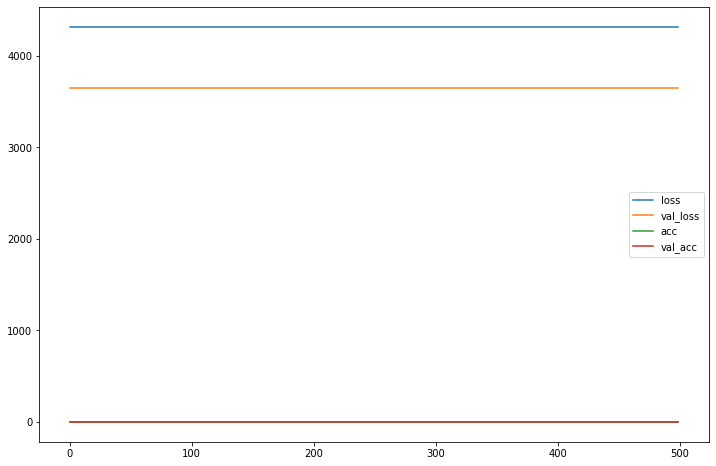

In [17]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])      # 훈련 비용
plt.plot(hist.history['val_loss'])  # 검증 비용
plt.plot(hist.history['accuracy'])       # 훈련 정확도
plt.plot(hist.history['val_accuracy'])   # 검증 정확도
plt.legend(['loss','val_loss','acc','val_acc'])
plt.show()

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)  # [0.39390555]
print("절편:", lr.intercept_)  # -0.03180434302675973
print("훈련 정확도:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.2f}".format(lr.score(X_test, y_test)))

기울기: [[  0.04029489   0.17063629   0.03923829   0.06050389   0.3467572
    0.56360787   0.85835075   0.07066596  -2.54506612  -0.27325483
    0.07388066  -0.26295225  -0.1496099   -0.04147524   1.40315362
    4.00538155  -3.46452941   0.75689156  -0.18931358  -0.2445803
    0.23195115   0.0504965   -0.13089647  13.94032442   3.15463139
  -17.15442152  -1.36703057   0.55219825   9.13724871   3.012757
   -0.41464454   0.23195115   0.0504965   -0.04166103  -0.15864217]]
절편: [63.32097972]
훈련 정확도:1.00
테스트 정확도:1.00


# K이웃

In [19]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,46):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# 데이터 경향 분석

In [20]:
df = pd.read_csv('kbo_data_2016to2020.csv')
count=1
plt.figure(figsize=(35,35), dpi=500)
for item in list(df.columns):
    if item!='W':
        plt.subplot(7, 6, count)
        plt.xlabel(item)
        plt.ylabel('W')
        plt.scatter(df[item], df['W'])
    count += 1